In [ ]:
import os
import time
import glob
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from PIL import Image
from skimage import io
from skimage import color
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize, downscale_local_mean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import StandardScaler
perdicted_scores=[]
threshold=128
def ImageMatch(img1 , img2 , method='cc' , normalize= False):
    
        if normalize==True:
            norm1 = StandardScaler()
            norm2 = StandardScaler()
            img_1 = norm1.fit_transform(img1)
            img_2 = norm2.fit_transform(img2)

        if method == 'cc':
            cross_corr=0        
            for x in range(len(img1)):    # x:row 
                for y in range(len(img2[x])):   # y:col
                    cross_corr += (img1[x][y]*img2[x][y])  # cross_Cor is the values of scores
            if cross_corr >= threshold :  # similar
                perdicted_scores.append(1)
            else:                  # not similar
                perdicted_scores.append(0) 
            return cross_corr    
               
        elif method=='conv':
            conv=0
            fliped_img1 = np.flip(img1, axis=0)  # flip rows
            fliped_img1_After = np.flip(fliped_img1, axis=1) # flip col
            for x in range(len(fliped_img1_After)):    # x-> row 
                for y in range(len(fliped_img1_After[x])):   # y-> col 
                    conv += (fliped_img1_After[x][y]*img2[x][y])  # cross_Cor is the values of scores
            
            if conv >= threshold :  # similar
                perdicted_scores.append(1)
            else:            # not similar
                perdicted_scores.append(0) 
            return conv    
              
        elif method == 'ssd':
            ssd=0
            for x in range(len(img1)):
                for y in range(len(img2[x])):
                    ssd += np.square(img1[x][y] - img2[x][y])
            if ssd >= threshold :  # not similar
                perdicted_scores.append(0)
            else:            # similar
                perdicted_scores.append(1) 
            return ssd    


In [ ]:
training_paths=[]   
training_pairs=[]   # similarity and nonsimilarity 
training_labels=[]  # labels of similarity and nonsimilarity pairs 


for (root,dirs,files) in os.walk('/content/drive/MyDrive/Dataset-20221111T204734Z-001/Dataset/training' ,topdown=True):
    for i in files :
        path=os.path.join(root,i)
        training_paths.append(path)
        
training_pairs = list(combinations(training_paths, 2))  

for i in training_pairs:
    imga =os.path.dirname(i[0])
    imgb=os.path.dirname(i[1])
    if(imga==imgb):
        training_labels.append(1)
    else :
        training_labels.append(0)
print(training_labels)        
print(len(training_labels))


Training_Images_path=[]
training_pairs.clear()
for i in training_paths:
    img = io.imread( i )
    img_resized = resize( img , (32 , 32 , 3 ) )  # 32*32*3
    img_gray = color.rgb2gray( img_resized  )     # 32*32
    Training_Images_path.append(img_gray)
training_pairs = list(combinations(Training_Images_path, 2)) 
            

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
training_scores=[]  # scores of the training images 
for i in training_pairs:
    img1=i[0]
    img2=i[1]
    results=ImageMatch(img1 , img2 ,'cc','no')
    print(results)
    training_scores.append(results)
print(training_scores)    

Streaming output truncated to the last 5000 lines.
249.81045559400252
249.9479815455593
249.97066416762792
250.15289023452536
249.82771337946943
250.16482891195665
250.21102556708945
250.2317445213381
249.99733660130727
250.1436236063049
250.1408054594388
250.0411803152633
249.99282103037285
250.0895136485967
249.96724048442903
250.08982314494415
250.01784794309887
250.10224625144164
249.6473289119569
250.11014321414856
249.97899942329846
250.10057766243756
250.03511918492862
249.99150230680476
249.92800076893468
249.7768992695116
250.20671953094975
250.02939734717415
249.99148308342976
250.16496347558657
250.0151009227217
250.04200211457137
250.01200692041513
249.99139850057676
249.82762399077302
249.9924077277966
250.12558150711286
250.29676470588237
250.02257689350236
249.85735005766983
249.92269031141873
250.0817675893889
249.8811322568242
250.11674932718202
250.0999644367552
250.06224048442868
250.0047770088429
250.1283342945021
250.08355728565957
250.0707026143793
250.19724432910

In [ ]:
predicted_train_label=[]
for i in training_scores:
    if i>=threshold:
        predicted_train_label.append(1)
    else:
        predicted_train_label.append(0)
print(predicted_train_label)        

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
def drawing_conf_matrix(  training_labels , predicted_train_label ):
    
    print( "Classification Report" )
    print ( classification_report(  training_labels , predicted_train_label )  ) 

    conf_mat = confusion_matrix( training_labels,   predicted_train_label )  
    print( "Confusion Matrix")
    print( conf_mat )
    sns.heatmap( conf_mat , annot= True  , fmt = "" )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13500
           1       0.16      1.00      0.28      2610

    accuracy                           0.16     16110
   macro avg       0.08      0.50      0.14     16110
weighted avg       0.03      0.16      0.05     16110

Confusion Matrix
[[    0 13500]
 [    0  2610]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


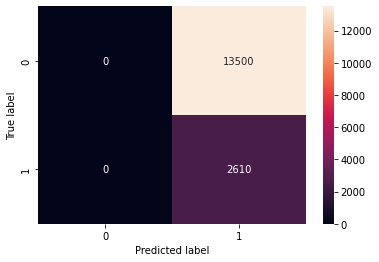

In [ ]:
drawing_conf_matrix( training_labels ,  predicted_train_label )

In [ ]:
testing_paths=[]   
testing_pairs=[]   # similarity and nonsimilarity
testing_labels=[]  # labels of similarity and nonsimilarity pairs


for (root,dirs,files) in os.walk('/content/drive/MyDrive/Dataset-20221111T204734Z-001/Dataset/testing' ,topdown=True):
    for i in files :
        path=os.path.join(root,i)
        testing_paths.append(path)
        
testing_pairs = list(combinations(testing_paths, 2))  

for i in testing_pairs:
    imga =os.path.dirname(i[0])
    imgb=os.path.dirname(i[1])
    if(imga==imgb):
        testing_labels.append(1)
    else :
        testing_labels.append(0)
print(testing_labels)        
print(len(testing_labels))


Testing_Images_path=[]
testing_pairs.clear()
for i in testing_paths:
    img = io.imread( i )
    img_resized = resize( img , (32 , 32 , 3 ) )  # 32*32*3
    img_gray = color.rgb2gray( img_resized  )     # 32*32
    Testing_Images_path.append(img_gray)
testing_pairs = list(combinations(Testing_Images_path, 2)) 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
testing_scores=[]  # scores of the training images 
for i in testing_pairs:
    img1=i[0]
    img2=i[1]
    results_S=ImageMatch(img1 , img2 ,'cc','no')
    print(results_S)
    testing_scores.append(results_S)
print(testing_scores)    

249.54046232218408
249.20201172625943
250.22894271434114
249.71923587081923
248.91516435986173
250.1099663590928
250.1656680123029
249.6591608996543
249.85774798154557
249.89397251057287
249.9558833141097
249.89719146482108
249.8622904652058
249.9343041138026
249.84379277201086
249.86387351018882
249.84423106497488
249.83070549788542
250.0472183775473
249.8563062283735
249.98244905805444
249.86415417147228
249.72349192618262
249.93528354479022
249.92826220684353
250.14326028450574
249.84498750480589
250.03936178392937
249.9270703575546
249.82996155324858
249.93687331795482
249.89810265282546
249.9328421760862
249.8130709342562
249.74198385236417
250.02521914648256
250.11649365628654
249.94213763936952
249.96879565551734
250.17181084198364
249.97672625913094
250.00064590542132
250.09772971933884
250.12268646674352
249.9852970011533
249.98023548635115
250.17542099192607
249.93711553248752
249.88260957324061
249.7570838139177
249.85059496347577
249.94993367935442
250.03863610149915
250.07

In [ ]:
predicted_test_label=[]
for i in testing_scores:
    if i>=threshold:
        predicted_test_label.append(1)
    else:
        predicted_test_label.append(0)
print(predicted_test_label)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
def drawing_conf_matrix(  testing_labels , predicted_test_label ):
    
    print( "Classification Report" )
    print ( classification_report(  testing_labels , predicted_test_label )  ) 

    conf_mat = confusion_matrix( testing_labels,   predicted_test_label )  
    print( "Confusion Matrix")
    print( conf_mat )
    sns.heatmap( conf_mat , annot= True  , fmt = "" )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1500
           1       0.15      1.00      0.26       270

    accuracy                           0.15      1770
   macro avg       0.08      0.50      0.13      1770
weighted avg       0.02      0.15      0.04      1770

Confusion Matrix
[[   0 1500]
 [   0  270]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


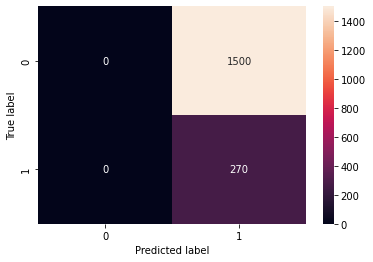

In [ ]:
drawing_conf_matrix( testing_labels ,  predicted_test_label )

In [ ]:
#MLP
x_train=[]
y_train=[]
x_test=[]
y_test=[]

for i in training_pairs:
    i=np.array(i)
    l=[]
    l=i.reshape(   (2048) )
    x_train.append(l)

    
for i in testing_pairs:
    i=np.array(i)
    l=[]
    l=i.reshape(   (2048) )
    x_test.append(l)    
    
for i in training_labels:
    y_train.append(i)
    
for i in testing_labels:
    y_test.append(i)  

In [ ]:
Logistic_model = LogisticRegression ( )

In [ ]:
Logistic_model = Logistic_model.fit( x_train ,  y_train  )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predict_y_train =  Logistic_model.predict( x_train  )

t1=time.time()

predict_y_test =  Logistic_model.predict( x_test  )

t2=time.time()


In [ ]:
excutionTime=t1-t2
print("ExcutionTime  MLP= ",excutionTime)

print("Acc in train = " ,accuracy_score(   y_train ,  predict_y_train  )  )
print("Acc in test = ", accuracy_score(   y_test ,  predict_y_test  )  )

ExcutionTime  MLP=  -0.015617609024047852
Acc in train =  0.9810055865921787
Acc in test =  0.5474576271186441


In [ ]:
conf_matrix = confusion_matrix(  y_test ,  predict_y_test  )
print(conf_matrix)

[[821 679]
 [122 148]]


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.55      0.67      1500
           1       0.18      0.55      0.27       270

    accuracy                           0.55      1770
   macro avg       0.52      0.55      0.47      1770
weighted avg       0.77      0.55      0.61      1770

Confusion Matrix
[[821 679]
 [122 148]]


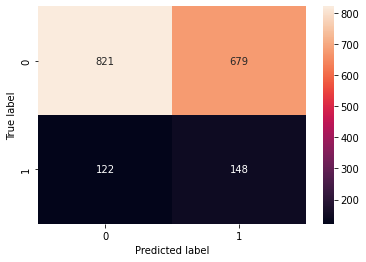

In [ ]:
drawing_conf_matrix( y_test ,  predict_y_test )


In [ ]:
import numpy as np
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit the scaler to the features and transform
X_train_std = sc.fit_transform(x_train)
X_test_std = sc.fit_transform(x_test)

# Create a pca object with the 32 components as a parameter
pca = decomposition.PCA(n_components=32)

# Fit the PCA and transform the data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

X_train_pca.shape
X_test_pca.shape


(1770, 32)

In [ ]:
lr = LogisticRegression()
lr = lr.fit(X_test_pca, y_test)


In [ ]:
prd=lr.predict(X_test_pca)

In [ ]:
print(prd)

[0 0 0 ... 0 0 0]


In [ ]:
predict_y_train =  lr.predict( X_train_pca )

t1=time.time()

predict_y_test =  lr.predict( X_test_pca  )

t2=time.time()

In [ ]:
excutionTime=t1-t2
print("ExcutionTime  MLP= ",excutionTime)

print("Acc in train = " ,accuracy_score(   y_train ,  predict_y_train  )  )
print("Acc in test = ", accuracy_score(   y_test ,  predict_y_test  )  )

ExcutionTime  MLP=  -0.0004363059997558594
Acc in train =  0.6458100558659218
Acc in test =  0.8615819209039548


In [ ]:
conf_matrix = confusion_matrix(  y_test ,  predict_y_test  )
print(conf_matrix)

[[1481   19]
 [ 226   44]]


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1500
           1       0.70      0.16      0.26       270

    accuracy                           0.86      1770
   macro avg       0.78      0.58      0.59      1770
weighted avg       0.84      0.86      0.82      1770

Confusion Matrix
[[1481   19]
 [ 226   44]]


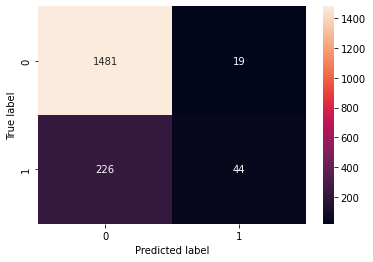

In [ ]:
drawing_conf_matrix( y_test ,  predict_y_test )